In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    multilabel_confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import joblib
from keras.saving import save_model
import gdown


In [2]:
# labelled_emails_df = pd.read_csv('../data/04_encoded_labelled_emails.csv')
# labelled_emails_df.sample(10, random_state=12)

In [3]:
# https://drive.google.com/file/d/1yyNEegKooJdARWIYw12NHycxOTgsoq6g/view?usp=sharing
gdown.download(
    'https://drive.google.com/uc?id=1yyNEegKooJdARWIYw12NHycxOTgsoq6g',
    'Y_train.npy',
    quiet=False
)
# Y_train = np.load('../model_data/Y_train.npy')
Y_train = np.load('Y_train.npy')

# https://drive.google.com/file/d/1gk3MKHhzqbVsFdIBZhz0P6sd7CBQNgPm/view?usp=drive_link
gdown.download(
    'https://drive.google.com/uc?id=1gk3MKHhzqbVsFdIBZhz0P6sd7CBQNgPm',
    'Y_test.npy',
    quiet=False
)
# Y_test = np.load('../model_data/Y_test.npy')
Y_test = np.load('Y_test.npy')

print('Y_train: ', Y_train)
print('Y_test: ', Y_test)
print('shape: ', Y_train.shape, Y_test.shape)

# https://drive.google.com/file/d/13CL1yIPah1Anv8vlrtZRSGkfHTy3zULe/view?usp=sharing
gdown.download(
    'https://drive.google.com/uc?id=13CL1yIPah1Anv8vlrtZRSGkfHTy3zULe',
    'X_train_bert.npy',
    quiet=False
)
# X_train = np.load("../model_data/X_train_bert.npy")
X_train = np.load("X_train_bert.npy")


# https://drive.google.com/file/d/1piWn9ifGd_2jygPow6nufIcFAYty6LqR/view?usp=sharing
gdown.download(
    'https://drive.google.com/uc?id=1piWn9ifGd_2jygPow6nufIcFAYty6LqR',
    'X_test_bert.npy',
    quiet=False
)
# X_test = np.load("../model_data/X_test_bert.npy")
X_test = np.load("X_test_bert.npy")

print('X_train: ', X_train)
print('X_test: ', X_test)
print('shape: ', X_train.shape, X_test.shape)

Downloading...
From: https://drive.google.com/uc?id=1yyNEegKooJdARWIYw12NHycxOTgsoq6g
To: /Users/pkchoy/code/data_science_bootcamp/predictor/notebooks/Y_train.npy
100%|██████████| 61.2k/61.2k [00:00<00:00, 40.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gk3MKHhzqbVsFdIBZhz0P6sd7CBQNgPm
To: /Users/pkchoy/code/data_science_bootcamp/predictor/notebooks/Y_test.npy
100%|██████████| 15.4k/15.4k [00:00<00:00, 11.1MB/s]


Y_train:  [[0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]]
Y_test:  [[0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]
shape:  (1910, 4) (478, 4)


Downloading...
From: https://drive.google.com/uc?id=13CL1yIPah1Anv8vlrtZRSGkfHTy3zULe
To: /Users/pkchoy/code/data_science_bootcamp/predictor/notebooks/X_train_bert.npy
100%|██████████| 5.87M/5.87M [00:00<00:00, 17.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1piWn9ifGd_2jygPow6nufIcFAYty6LqR
To: /Users/pkchoy/code/data_science_bootcamp/predictor/notebooks/X_test_bert.npy
100%|██████████| 1.47M/1.47M [00:00<00:00, 15.0MB/s]

X_train:  [[-0.42312354 -0.54868555 -0.9643042  ... -0.83245724 -0.47842208
   0.39699167]
 [-0.57316715 -0.5088102  -0.9850985  ... -0.9398462  -0.6190099
   0.5867044 ]
 [-0.74162996 -0.547777   -0.9917878  ... -0.9471306  -0.71309376
   0.6183656 ]
 ...
 [-0.66844153 -0.53841984 -0.98510987 ... -0.9122262  -0.6085401
   0.66095567]
 [-0.5810163  -0.5780096  -0.9945758  ... -0.93074936 -0.59250724
   0.46010888]
 [-0.5250289  -0.4235095  -0.7941735  ... -0.6300716  -0.5897973
   0.7063313 ]]
X_test:  [[-0.7456036  -0.44178432 -0.93770844 ... -0.6760092  -0.699894
   0.7909855 ]
 [-0.22628589 -0.67924935 -0.9985358  ... -0.97362983 -0.58610976
   0.00793173]
 [-0.4620166  -0.5690267  -0.9506907  ... -0.8115123  -0.6664765
   0.5361389 ]
 ...
 [-0.70236105 -0.6138162  -0.9966875  ... -0.9764868  -0.7648148
   0.630365  ]
 [-0.23031758 -0.39595905 -0.97728676 ... -0.9306691  -0.5013273
   0.34250247]
 [-0.5420912  -0.4853121  -0.9901664  ... -0.9081111  -0.6018916
   0.14927669]]
shape:

## Train a Logistic Regression classifier

In [4]:
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_reg.fit(X_train, Y_train)

y_pred_probs_log_reg = log_reg.predict_proba(X_test)

# Convert to shape (n_samples, n_classes)
# y_pred_probs_log_reg_arr = np.stack([p[:, 1] for p in y_pred_probs_log_reg], axis=1)

threshold_log_reg = 0.2
y_pred_log_reg_custom = (y_pred_probs_log_reg >= threshold_log_reg).astype(int)
# y_pred_log_reg = log_reg.predict(X_test)
# y_pred_log_reg

## Evaluate the Logistic Regression classifier

In [5]:
# conf_matrix_log_reg = confusion_matrix(Y_test.argmax(axis=1), y_pred_log_reg.argmax(axis=1))
# sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens',
#             xticklabels=['D', 'I', 'S', 'C'], yticklabels=['D', 'I', 'S', 'C'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()

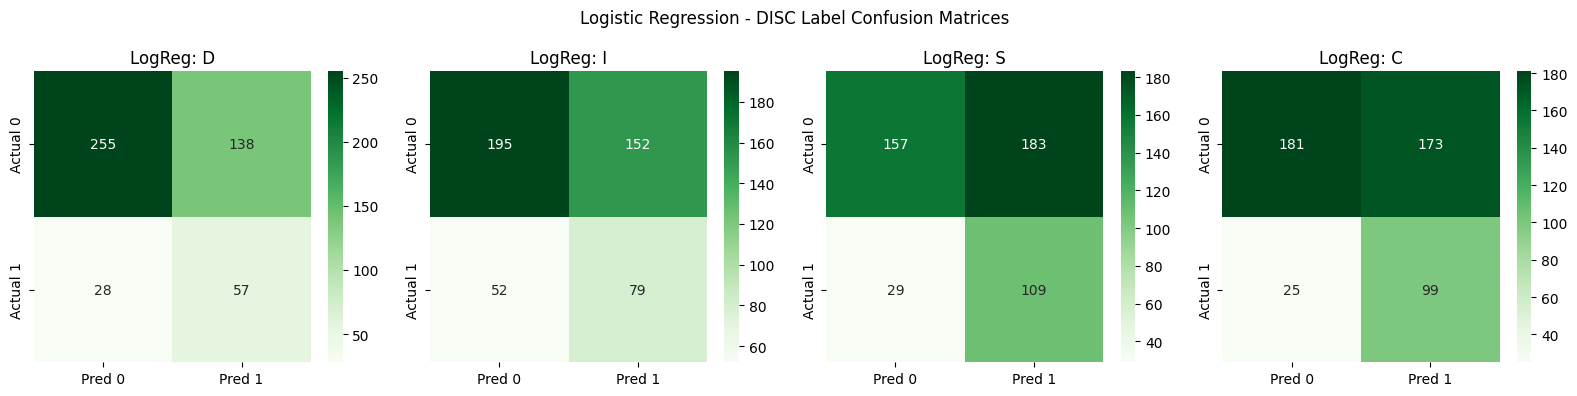

<Figure size 640x480 with 0 Axes>

In [6]:
labels = ['D', 'I', 'S', 'C']
conf_matrix_log_reg = multilabel_confusion_matrix(Y_test, y_pred_log_reg_custom)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, label in enumerate(labels):
    sns.heatmap(conf_matrix_log_reg[i], annot=True, fmt='d', cmap='Greens',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['Actual 0', 'Actual 1'],
                ax=axes[i])
    axes[i].set_title(f"LogReg: {label}")

plt.suptitle("Logistic Regression - DISC Label Confusion Matrices")
plt.tight_layout()
plt.show()

plt.savefig('../figures/06_log_reg_bootstrap_0.2_confusion_matrices.png')

In [7]:
print("Logistic Regression with threshold of 0.2: \n", classification_report(Y_test, y_pred_log_reg_custom, target_names=labels))

Logistic Regression with threshold of 0.2: 
               precision    recall  f1-score   support

           D       0.29      0.67      0.41        85
           I       0.34      0.60      0.44       131
           S       0.37      0.79      0.51       138
           C       0.36      0.80      0.50       124

   micro avg       0.35      0.72      0.47       478
   macro avg       0.34      0.72      0.46       478
weighted avg       0.35      0.72      0.47       478
 samples avg       0.37      0.72      0.48       478



In [8]:
joblib.dump(log_reg, "../models/log_reg_bootstrap.pkl")

['../models/log_reg_bootstrap.pkl']

## Train an MLP

In [9]:
mlp = Sequential()
mlp.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
mlp.add(Dropout(0.1))
mlp.add(Dense(336, activation='relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(4, activation='sigmoid'))


/Users/pkchoy/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
mlp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlp.fit(X_train, Y_train, epochs=30, batch_size=32, callbacks=early_stop, validation_split=0.2, verbose=1)

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3098 - loss: 0.6018 - val_accuracy: 0.2958 - val_loss: 0.5571
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 0.5586 - val_accuracy: 0.3037 - val_loss: 0.5538
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3113 - loss: 0.5562 - val_accuracy: 0.3115 - val_loss: 0.5594
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3282 - loss: 0.5533 - val_accuracy: 0.3063 - val_loss: 0.5529
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 0.5512 - val_accuracy: 0.3063 - val_loss: 0.5509
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 0.5567 - val_accuracy: 0.3665 - val_loss: 0.5476
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3509 - loss: 0.5511 - val_accuracy: 0.3298 - val_loss: 0.5494
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 0.5461 - val_accuracy: 0.3429 - val_loss:

In [12]:
loss, accuracy = mlp.evaluate(X_test, Y_test)
print('Test Loss: ', loss)
print('Test Accuracy: ', accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3846 - loss: 0.5384 
Test Loss:  0.5431129336357117
Test Accuracy:  0.38075312972068787


In [13]:
threshold_mlp = 0.2
y_pred_probs_mlp = mlp.predict(X_test)
# y_pred_mlp = np.where(y_pred_probs_mlp >= threshold, 1, 0)
y_pred_mlp = (y_pred_probs_mlp >= threshold_mlp).astype(int)
# confusion_matrix_mlp = confusion_matrix(Y_test.argmax(axis=1, y_pred_mlp.argmax(axis=1))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:
print("MLP with threshold of 0.2: \n", classification_report(Y_test, y_pred_mlp, target_names=['D', 'I', 'S', 'C']))

MLP with threshold of 0.2: 
               precision    recall  f1-score   support

           D       0.26      0.79      0.40        85
           I       0.29      0.78      0.42       131
           S       0.32      0.95      0.47       138
           C       0.33      0.75      0.46       124

   micro avg       0.30      0.82      0.44       478
   macro avg       0.30      0.82      0.44       478
weighted avg       0.30      0.82      0.44       478
 samples avg       0.31      0.82      0.45       478



In [15]:
print(Y_train.sum(axis=0))  # Count of D, I, S, C in training data

[418 451 536 505]


In [16]:
# conf_matrix_mlp = confusion_matrix(Y_test.argmax(axis=1), y_pred_mlp.argmax(axis=1))
# sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['D', 'I', 'S', 'C'], yticklabels=['D', 'I', 'S', 'C'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for MLP')
# plt.show()

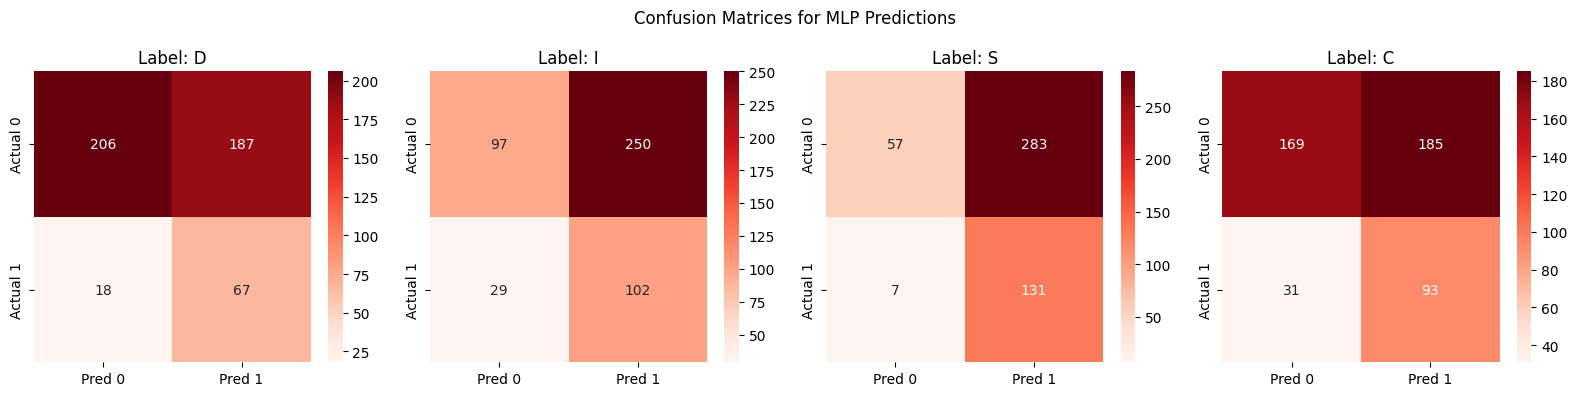

<Figure size 640x480 with 0 Axes>

In [17]:
conf_matrix_mlp = multilabel_confusion_matrix(Y_test, y_pred_mlp)

# Plot each label's confusion matrix
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, label in enumerate(labels):
    sns.heatmap(conf_matrix_mlp[i], annot=True, fmt='d', cmap='Reds',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['Actual 0', 'Actual 1'],
                ax=axes[i])
    axes[i].set_title(f"Label: {label}")

plt.suptitle("Confusion Matrices for MLP Predictions")
plt.tight_layout()
plt.show()

plt.savefig('../figures/06_mlp_bootstrap_0.2_confusion_matrices.png')


In [18]:
save_model(mlp, "../models/mlp_bootstrap.keras")